In [66]:
import models
import datasets
import loss_functions
import networks

import numpy as np
import random
import os
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
from numpy.linalg import norm
def euclidean_disance(x, y):
    return norm(x - y)


def most_common(arr):
    counts = np.bincount(arr)
    return np.argmax(counts)

In [68]:
def predict_label(encoding, encodings, labels, k):
    distances = np.zeros(len(encodings))
    for indx, x in enumerate(encodings, 0):
        distance = euclidean_disance(encoding, x)
        distances[indx] = distance

    zipped = list(zip(encodings, distances, labels))
    zipped.sort(key=lambda t: t[1])
    zipped = zipped[1:k + 1]
    labels = np.array(zipped)[:, 2].astype(int)
    result = most_common(labels)
    return result

In [69]:
def plot_results(encodings, labels):
    color = ['blue' if label == 0 else 'red' for label in labels]
    plt.scatter(encodings[:, 0], encodings[:, 1], c=color)
    plt.show()

In [70]:
def print_scores(labels, predicted_labels):
    print("Accuracy: {}".format(accuracy_score(labels, predicted_labels)))
    print("Precision: {}".format(precision_score(labels, predicted_labels)))
    print("Recall: {}".format(recall_score(labels, predicted_labels)))
    print("F1: {}".format(f1_score(labels, predicted_labels)))

In [71]:
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.show()

In [72]:
def undersample(images):
    false_images = []
    true_images = []
    for image in images:
        false_images.append(image) if image.__contains__("False") else true_images.append(image)

    false_images = false_images[0:len(true_images)]
    images = false_images
    images.extend(true_images)
    return images

In [73]:
def eval_model(model, dataloader_train, dataloader_test):
    encodings, labels = model.predict(dataloader_train)
    plot_results(encodings, labels)
    
    encodings, labels = model.predict(dataloader_test)
    plot_results(encodings, labels)
    
    predicted_labels = []
    for encoding, label in (zip(encodings, labels)):
        predicted_labels.append(predict_label(encoding, encodings, labels, 3))

    predicted_labels = np.array(predicted_labels)
    print_scores(labels, predicted_labels)

# T2

In [9]:
path = './Data/t2_tra_np_min_max'
images = os.listdir(path)
random.shuffle(images)

In [10]:
train, test = train_test_split(images, test_size=0.4)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [11]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net2DChannel1()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


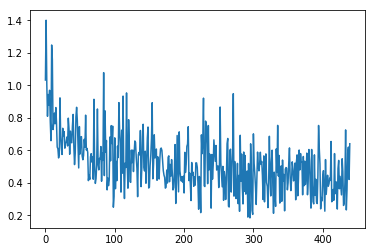

In [12]:
plot_loss(loss_history)

In [13]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

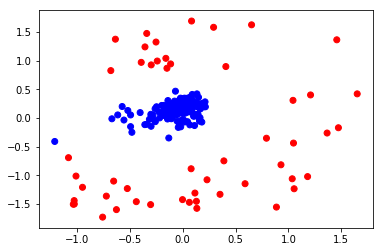

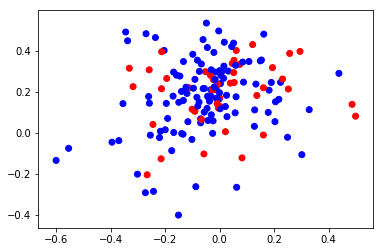

Accuracy: 0.7232704402515723
Precision: 0.4782608695652174
Recall: 0.2558139534883721
F1: 0.33333333333333337


In [14]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# Diff

In [15]:
path = './Data/diff_ADC_BVAL_np_min_max'
images = os.listdir(path)
random.shuffle(images)

In [16]:
train, test = train_test_split(images, test_size=0.4)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [17]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net2DChannel2()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


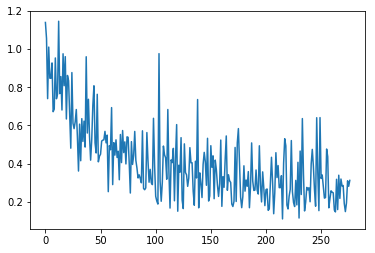

In [18]:
plot_loss(loss_history)

In [19]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

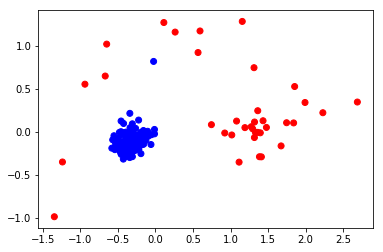

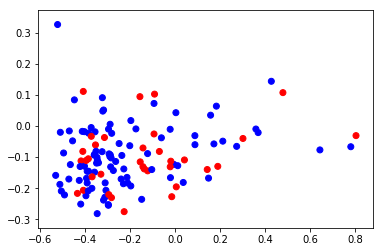

Accuracy: 0.6746031746031746
Precision: 0.3333333333333333
Recall: 0.20588235294117646
F1: 0.2545454545454545


In [20]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# T2 3D

In [21]:
path = './Data/t2_tra_np_3D_min_max'
images = os.listdir(path)
random.shuffle(images)

In [22]:
train, test = train_test_split(images, test_size=0.4)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [23]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net3DChannel1()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


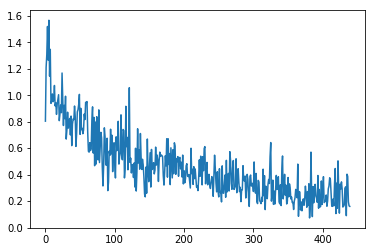

In [24]:
plot_loss(loss_history)

In [25]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

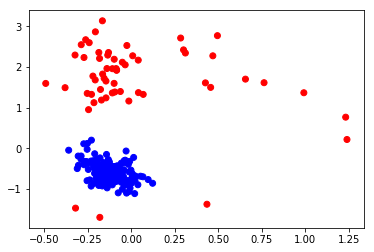

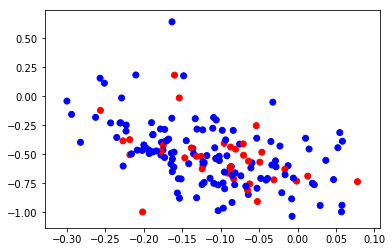

Accuracy: 0.710691823899371
Precision: 0.25
Recall: 0.1388888888888889
F1: 0.17857142857142858


In [26]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# Diff 3D

In [36]:
path = './Data/diff_ADC_BVAL_3D_np_min_max'
images = os.listdir(path)
random.shuffle(images)

In [37]:
train, test = train_test_split(images, test_size=0.4)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [38]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net3DChannel2()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


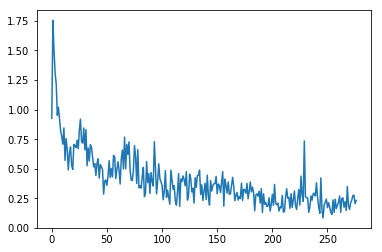

In [39]:
plot_loss(loss_history)

In [40]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

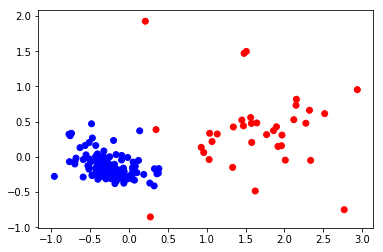

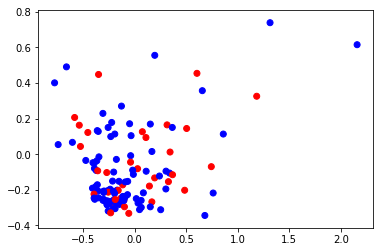

Accuracy: 0.6111111111111112
Precision: 0.2
Recall: 0.14705882352941177
F1: 0.16949152542372883


In [41]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# T2 Undersample

In [42]:
path = './Data/t2_tra_np_min_max'
images = os.listdir(path)
random.shuffle(images)
images = undersample(images)


In [43]:
train, test = train_test_split(images, test_size=0.2)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [44]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net2DChannel1()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


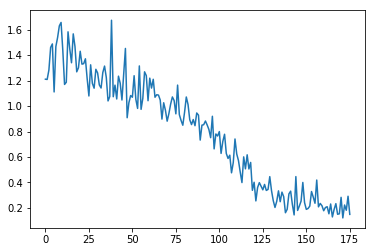

In [45]:
plot_loss(loss_history)

In [46]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

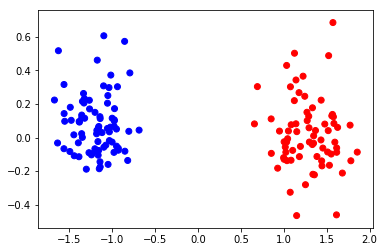

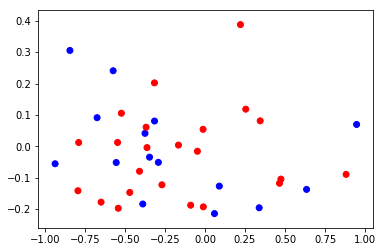

Accuracy: 0.34210526315789475
Precision: 0.46153846153846156
Recall: 0.5217391304347826
F1: 0.4897959183673469


In [47]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# Diff Undersample

In [48]:
path = './Data/diff_ADC_BVAL_np_min_max'
images = os.listdir(path)
images = undersample(images)
random.shuffle(images)


In [49]:
train, test = train_test_split(images, test_size=0.2)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [50]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net2DChannel2()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


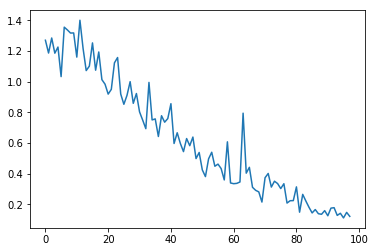

In [51]:
plot_loss(loss_history)

In [52]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

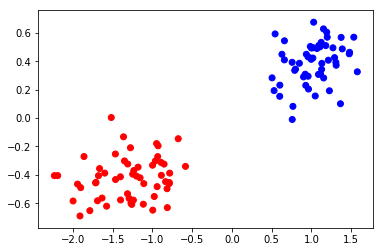

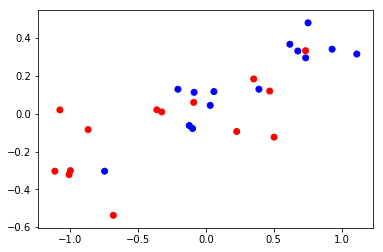

Accuracy: 0.6785714285714286
Precision: 0.7272727272727273
Recall: 0.5714285714285714
F1: 0.64


In [53]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# T2 3D Undersample

In [54]:
path = './Data/t2_tra_np_3D_min_max'
images = os.listdir(path)
random.shuffle(images)
images = undersample(images)

In [55]:
train, test = train_test_split(images, test_size=0.2)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [56]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net3DChannel1()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


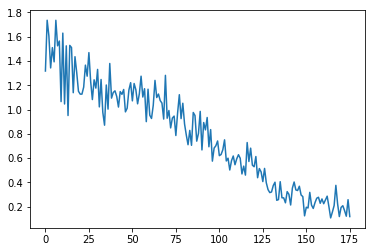

In [57]:
plot_loss(loss_history)

In [58]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

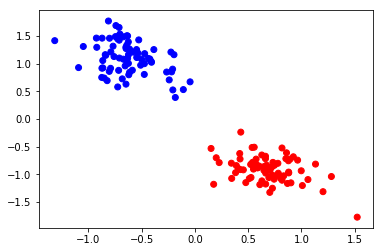

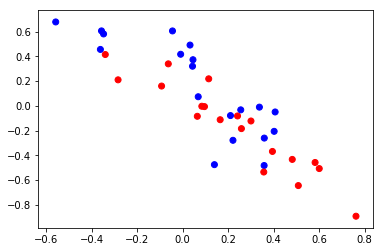

Accuracy: 0.7105263157894737
Precision: 0.7
Recall: 0.7368421052631579
F1: 0.717948717948718


In [59]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)

# Diff 3D Undersample

In [80]:
path = './Data/diff_ADC_BVAL_3D_np_min_max'
images = os.listdir(path)
random.shuffle(images)
images = undersample(images)

In [81]:
train, test = train_test_split(images, test_size=0.2)
dataset_train = datasets.SiameseDataset(path, train)
dataset_test = datasets.SiameseDataset(path, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [82]:
%%capture

model = models.SiameseModel(1, 0.0001, networks.SiameseNet(networks.Net3DChannel2()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


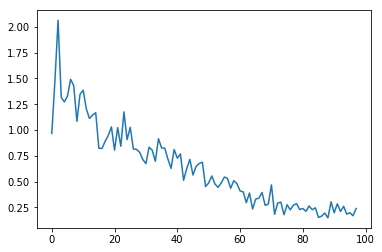

In [83]:
plot_loss(loss_history)

In [84]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

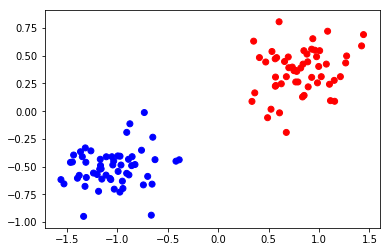

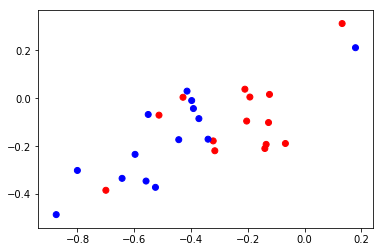

Accuracy: 0.7142857142857143
Precision: 0.75
Recall: 0.6428571428571429
F1: 0.6923076923076924


In [85]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)